In [2]:
# basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder

# compose
from sklearn.compose import ColumnTransformer
# pipeline
from sklearn.pipeline import Pipeline

# model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# imbalancead learn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# classifiers
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# load dataset train
train = pd.read_csv('adult_income_dataset_train.csv')
print(train.shape)

(27656, 16)


In [4]:
# balance check
train.value_counts('income')

income
<=50K    20953
>50K      6703
dtype: int64

In [5]:
# balance check
train.value_counts('income', normalize=True)*100

income
<=50K    75.762945
>50K     24.237055
dtype: float64

Unbalanced target

In [6]:
train.head(2)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985


In [7]:
# na check
train.isna().mean()

index             0.0
age               0.0
workclass         0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
ID                0.0
dtype: float64

## checking categorical features

In [8]:
train['workclass'].unique()

array(['Local-gov', 'Private', 'Federal-gov', 'Self-emp-not-inc', '?',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
train['education'].unique()

array(['HS-grad', 'Bachelors', 'Some-college', '7th-8th', 'Assoc-voc',
       'Masters', 'Assoc-acdm', '1st-4th', '5th-6th', 'Prof-school',
       '9th', '10th', '11th', '12th', 'Doctorate', 'Preschool'],
      dtype=object)

In [10]:
train.value_counts('education')

education
HS-grad         8934
Some-college    6223
Bachelors       4583
Masters         1474
Assoc-voc       1147
11th             982
Assoc-acdm       886
10th             794
7th-8th          535
Prof-school      495
9th              429
12th             365
Doctorate        352
5th-6th          275
1st-4th          139
Preschool         43
dtype: int64

In [11]:
train.value_counts('education.num')

education.num
9     8934
10    6223
13    4583
14    1474
11    1147
7      982
12     886
6      794
4      535
15     495
5      429
8      365
16     352
3      275
2      139
1       43
dtype: int64

### 'education.num' is 'education' with OrdinalEncoding, but codification starts in 1, not in 0

In [12]:
train['marital.status'].unique()

array(['Divorced', 'Married-civ-spouse', 'Never-married', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [13]:
train['occupation'].unique()

array(['Protective-serv', 'Exec-managerial', 'Craft-repair',
       'Prof-specialty', 'Tech-support', 'Other-service',
       'Transport-moving', 'Adm-clerical', 'Farming-fishing',
       'Handlers-cleaners', '?', 'Sales', 'Machine-op-inspct',
       'Priv-house-serv', 'Armed-Forces'], dtype=object)

In [14]:
train['relationship'].unique()

array(['Own-child', 'Wife', 'Husband', 'Not-in-family', 'Unmarried',
       'Other-relative'], dtype=object)

In [15]:
train['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [16]:
train['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
train['native.country'].unique()

array(['United-States', '?', 'Jamaica', 'India', 'Mexico', 'Philippines',
       'Dominican-Republic', 'El-Salvador', 'China', 'Thailand',
       'Ireland', 'Laos', 'Iran', 'France', 'Guatemala', 'South',
       'Puerto-Rico', 'Japan', 'Portugal', 'Greece', 'Canada', 'Poland',
       'Peru', 'Cuba', 'Columbia', 'Germany', 'Italy', 'Hong', 'Haiti',
       'Ecuador', 'England', 'Nicaragua', 'Cambodia', 'Trinadad&Tobago',
       'Vietnam', 'Honduras', 'Taiwan', 'Scotland', 'Yugoslavia',
       'Hungary', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands'],
      dtype=object)

In [18]:
train['native.country'].value_counts()

United-States                 24811
Mexico                          532
?                               504
Philippines                     167
Germany                         108
Canada                           97
Puerto-Rico                      94
El-Salvador                      94
India                            84
England                          78
Cuba                             77
Jamaica                          72
China                            65
Dominican-Republic               64
South                            64
Italy                            61
Vietnam                          56
Japan                            56
Poland                           48
Columbia                         46
Guatemala                        44
Haiti                            41
Taiwan                           40
Iran                             38
Portugal                         35
Nicaragua                        32
Greece                           27
Ecuador                     

### although there is no np.nan, there are entries with the string '?' in the features 'workclass' and 'occupation'

In [19]:
# total missing data
train.loc[(train['workclass'] == '?') | (train['occupation'] == '?')].shape[0]

1546

In [20]:
# matches of '?' in both features
train.loc[(train['workclass'] == '?') & (train['occupation'] == '?')].shape[0]

1539

In [21]:
# matches of '?' in both features whose target is >50K
train.loc[(train['workclass'] == '?') & (train['occupation'] == '?') & (train['income'] == '>50K')].shape[0]

162

In [22]:
# matches of '?' in both features whose target is <=50K
train.loc[(train['workclass'] == '?') & (train['occupation'] == '?') & (train['income'] == '<=50K')].shape[0]

1377

In [23]:
# percentage of missing data in relation to total data
train.loc[(train['workclass'] == '?') | (train['occupation'] == '?')].shape[0] / len(train) *100

5.5901070292160835

In [24]:
# checking before drop
train.shape

(27656, 16)

In [25]:
# drop of the '?'
train = train.replace({'?': np.nan})
train = train.dropna().reset_index(drop=True)

In [26]:
# checking after drop
train.shape

(25629, 16)

in total, there are 1546 entries with missing data, of which 1539 match.
of the 1539, 162 earn more than 50k (lower proportion category), while 1377 earn less than or equal to 50k (higher proportion category).
1546 represent 5.59% of the total. since qualitative variables are not easy to impute if there are no real relationship between features (in this case apparently there is none), it was decided to delete these entries from the dataset since imputation would add more noise than clarity.

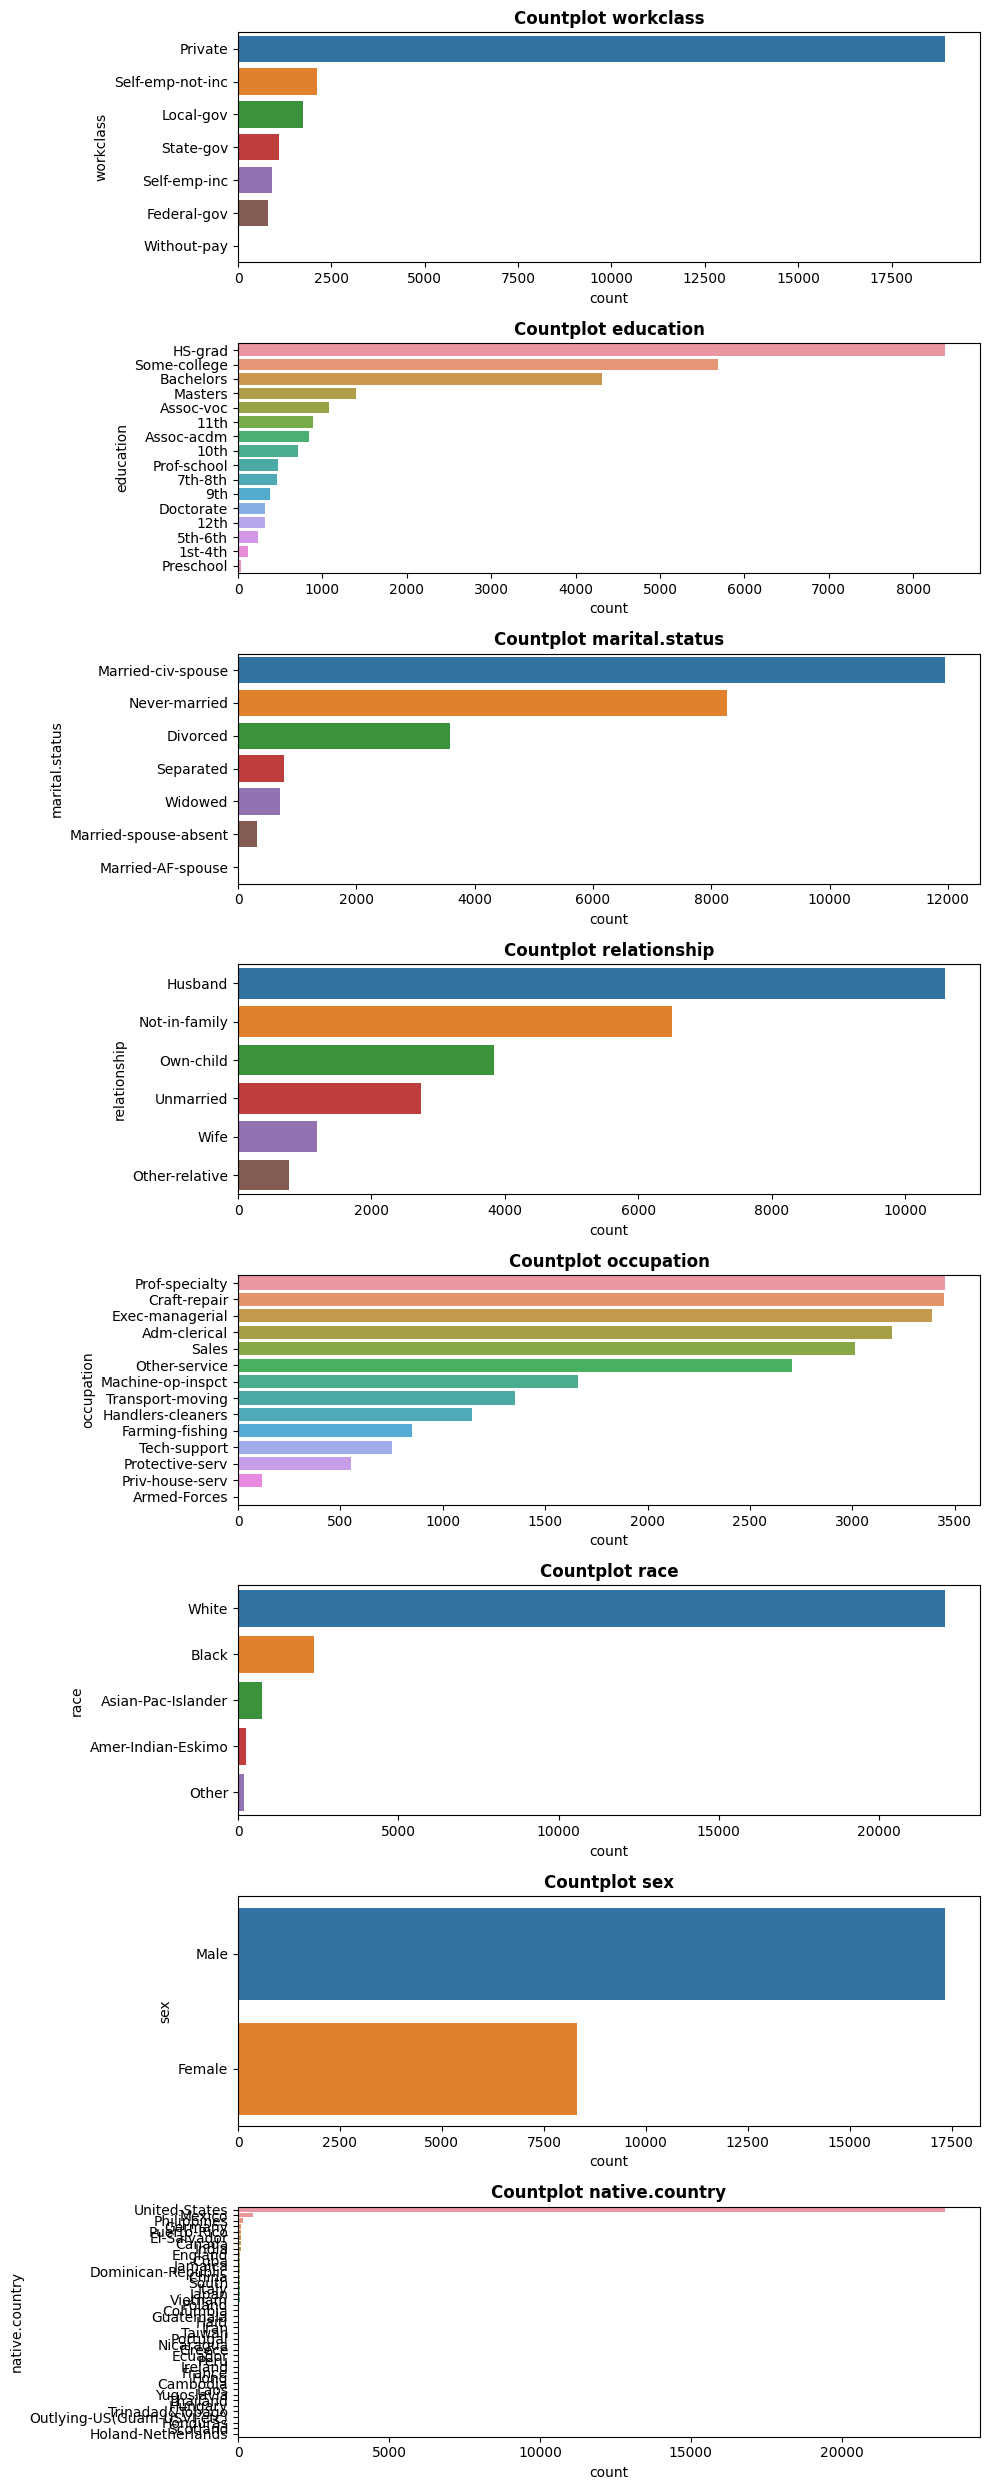

In [27]:
categorical_features = ['workclass', 'education', 'marital.status', 'relationship', 'occupation', 'race', 'sex', 'native.country']
fig, ax = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10,25))

for i, feature in enumerate(categorical_features):
    ax[i] = sns.countplot(y=train[feature], ax=ax[i], order=train[feature].value_counts().index)
    ax[i].set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
plt.tight_layout()
plt.show()

## checking  numerical features

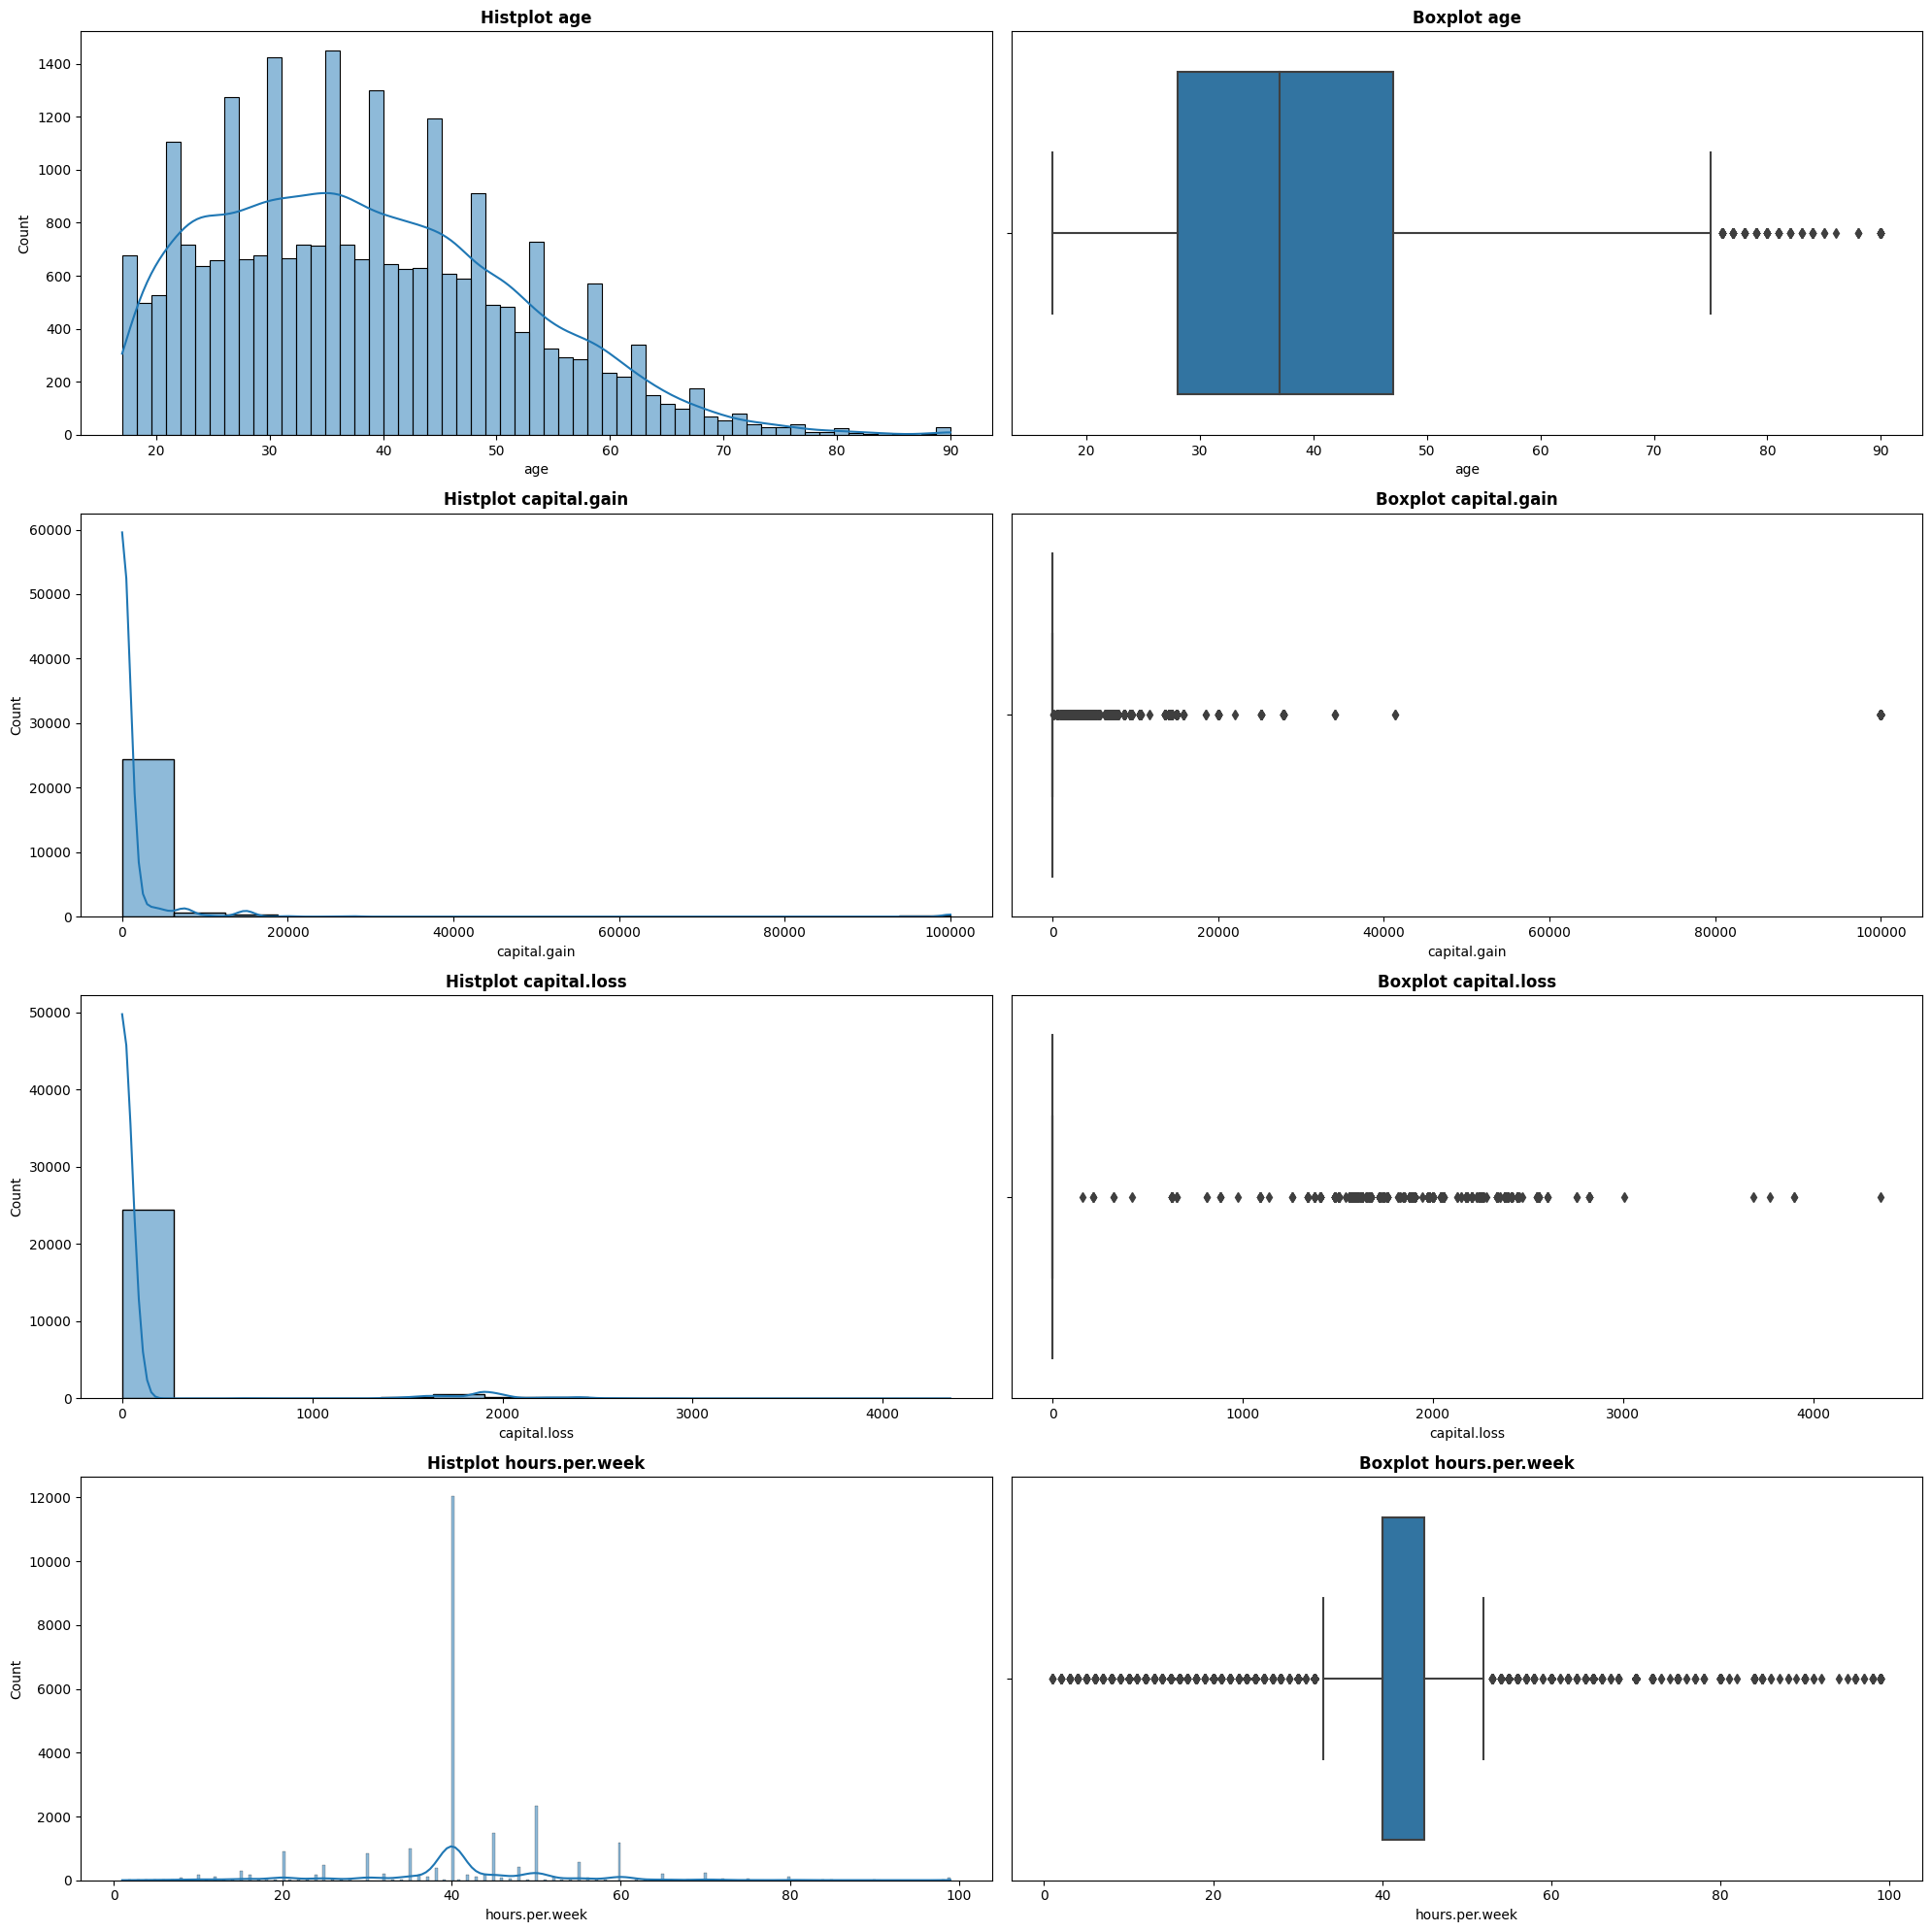

In [28]:
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
fig, ax = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(20,20))

for i, feature in enumerate(numerical_features):
    ax[i][0] = sns.histplot(x=train[feature], ax=ax[i][0], kde=True)
    ax[i][0].set_title(f'Histplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
    ax[i][1] = sns.boxplot(x=train[feature], ax=ax[i][1])
    ax[i][1].set_title(f'Boxplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})

plt.tight_layout()
plt.show()

In [29]:
# how many entries in 'capital.gain' are 0?
train.loc[train['capital.gain'] == 0, 'capital.gain'].count()/len(train)

0.9157204729017909

In [30]:
# how many entries in 'capital.loss' are 0?
train.loc[train['capital.loss'] == 0, 'capital.loss'].count()/len(train)

0.9524757111085099

91-95% of the entries in the 'capital.gain' and 'capital.loss' features have a value of 0. i tested with and without this features and all the models perform better including them

check 'hours.per.week'

In [31]:
# outliears %
mean_hpw = train['hours.per.week'].mean()
std_hpw = train['hours.per.week'].std()
outliers_std3 = train.loc[(train['hours.per.week'] > (mean_hpw - std_hpw*3)) & (train['hours.per.week'] > (mean_hpw + std_hpw*3)), 'hours.per.week'].count()
outliers_std3/len(train)*100

1.1198251980178704

the outliers are 1.1% taking into account the 3 std criterion. since they do not appear to be misloaded data (excessively high value) and the distributions accept low levels of outliers, they are not eliminated

# check models

In [34]:
# definition of the features to be used
nominal_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'] # 'marital.status' and 'relationship' contains similar
ordinal_features = ['education']
numerical_features = ['age', 'hours.per.week', 'capital.loss', 'capital.gain']

# X and y
X = train[nominal_features + numerical_features + ordinal_features].copy()
y = train['income'].copy()
# encoding target y
le = LabelEncoder()
y = le.fit_transform(y)

# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# KFolds definition
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# categories definition in 'education'
categories_education = [['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                         '10th', '11th', '12th','HS-grad', 'Some-college',
                         'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
                         'Prof-school', 'Doctorate']]

# preprocessor
preprocessor = ColumnTransformer(transformers=[('scalar',
                                                Pipeline(steps=[('scalar', StandardScaler())]),
                                                numerical_features),
                                               ('onehot',
                                                Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=True))]),
                                                nominal_features),
                                               ('ordinal',
                                                Pipeline(steps=[('ordinal', OrdinalEncoder(categories=categories_education))]),
                                                ordinal_features)
                                               ],
                                 remainder='passthrough'
                                )

# report function
def report(X, y, model, df_model):
    """
    in: X_test, y_test, model, df_model
    out: print a best_params_, train_score, test_score, clasification_report and plot the confusion_matrix
    """

    print(f'best_params_: {model.best_params_}')
    train_score = float(df_model.loc[df_model['rank_test_score'] == 1, 'mean_train_score'])
    print(f'Train_score: {train_score}')
    print(f'Test_score_: {model.best_score_}')

    y_test_hat = model.best_estimator_.predict(X_test)
    clasification_report = classification_report(y_test, y_test_hat)
    print(clasification_report)

    confusion = confusion_matrix(y_test, y_test_hat)
    disp = ConfusionMatrixDisplay(confusion)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

## DecisionTreeClassifier
### without imblearn, tuning max_depth to make a nice plot to show under and overfitting

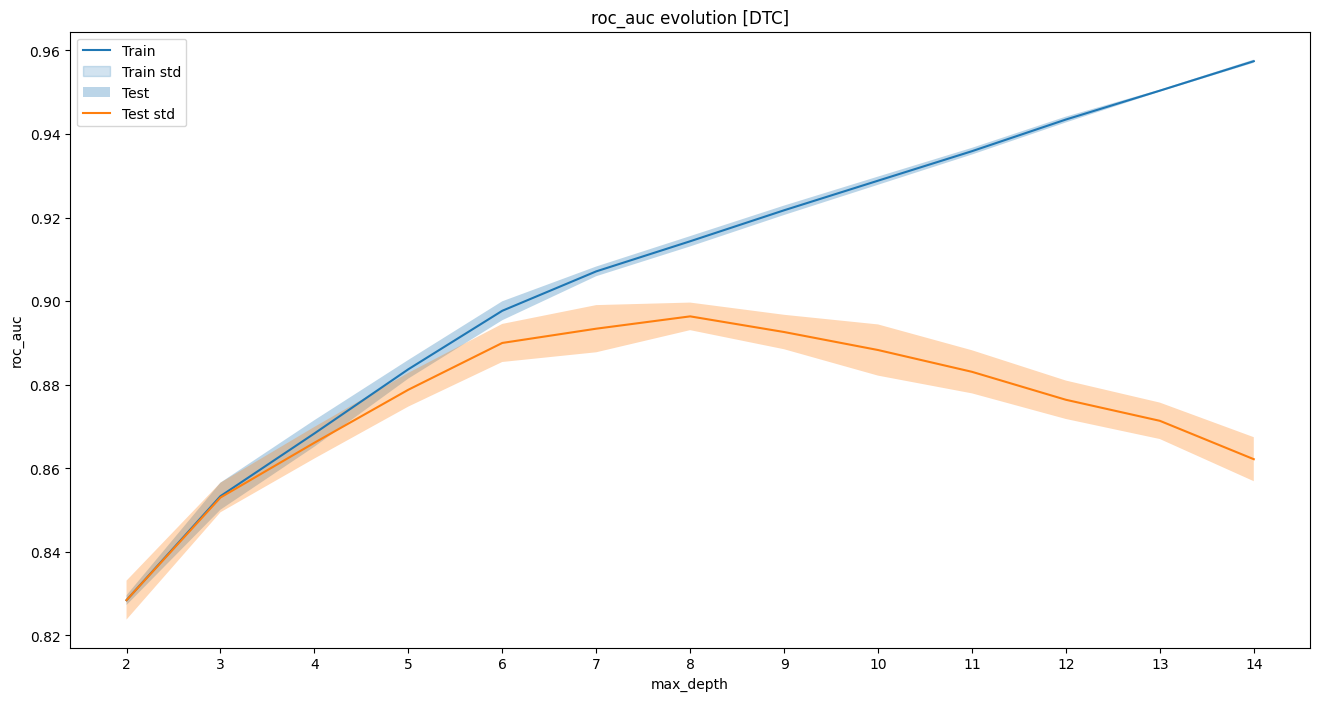

best_params_: {'dtc__max_depth': 8}
Train_score: 0.9143203645901344
Test_score_: 0.8963525010360478
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3842
           1       0.80      0.51      0.62      1284

    accuracy                           0.85      5126
   macro avg       0.83      0.73      0.76      5126
weighted avg       0.84      0.85      0.83      5126



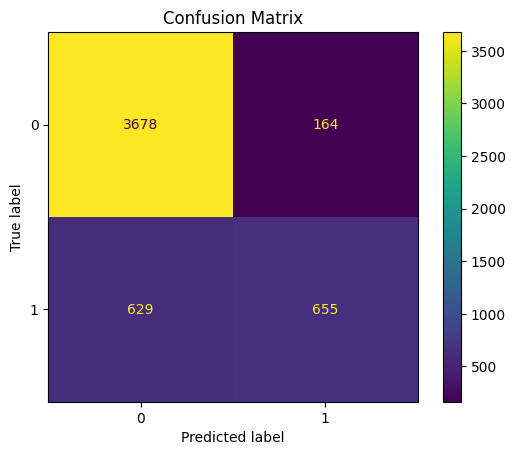

In [35]:
# GridSearchCV DTC
# pipe with preprocessor and model
pipe_dtc = Pipeline([('preprocessing', preprocessor),
                    ('dtc', DecisionTreeClassifier(random_state=42))
                    ])

param_grid = {
            'dtc__max_depth': [d for d in range(2, 15, 1)]
            }

grid_dtc = GridSearchCV(estimator=pipe_dtc,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_dtc.fit(X_train, y_train)

# results in dataframe
df_dtc = pd.DataFrame(grid_dtc.cv_results_)

# plot
plt.figure(figsize=(16, 8))

# train
sns.lineplot(x=df_dtc['param_dtc__max_depth'].values,
             y=df_dtc['mean_train_score'].values)
plt.fill_between(df_dtc['param_dtc__max_depth'].astype('float'),
                df_dtc['mean_train_score'] + df_dtc['std_train_score'],
                df_dtc['mean_train_score'] - df_dtc['std_train_score'],
                alpha=0.3)

# test
sns.lineplot(x=df_dtc['param_dtc__max_depth'].values,
             y=df_dtc['mean_test_score'].values)
plt.fill_between(df_dtc['param_dtc__max_depth'].astype('float'),
                df_dtc['mean_test_score'] + df_dtc['std_test_score'],
                df_dtc['mean_test_score'] - df_dtc['std_test_score'],
                alpha=0.3)

plt.xticks(list(df_dtc['param_dtc__max_depth'].values))
plt.legend(labels = ['Train','Train std', 'Test', 'Test std'])
plt.title('roc_auc evolution [DTC]')
plt.ylabel('roc_auc')
plt.xlabel('max_depth')
plt.show()

# report
report(X_test, y_test, grid_dtc, df_dtc)

### full tunning without RUS

best_params_: {'dtc__criterion': 'gini', 'dtc__max_depth': 10, 'dtc__max_features': None, 'dtc__min_samples_leaf': 30, 'dtc__min_samples_split': 74}
Train_score: 0.9180076631496185
Test_score_: 0.9012275044959945
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3842
           1       0.76      0.57      0.65      1284

    accuracy                           0.85      5126
   macro avg       0.81      0.76      0.78      5126
weighted avg       0.84      0.85      0.84      5126



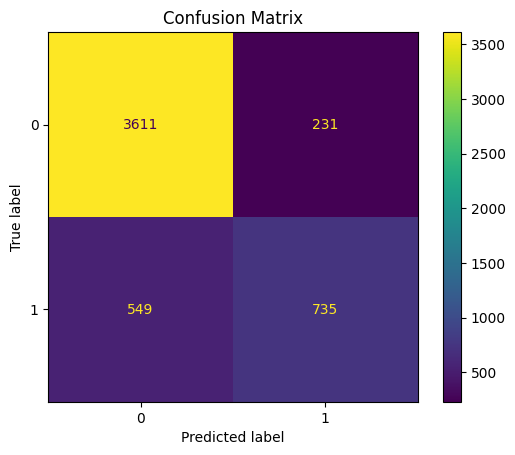

In [36]:
# GridSearchCV DTC
# pipe with preprocessor and model
pipe_dtc = Pipeline([('preprocessing', preprocessor),
                    ('dtc', DecisionTreeClassifier(random_state=42))
                    ])

param_grid = {
            'dtc__criterion': ['gini', 'entropy'],
            'dtc__max_depth': [x for x in range(8, 12, 1)],
            'dtc__min_samples_leaf': [x for x in range(28, 33, 1)],
            'dtc__min_samples_split': [x for x in range(73, 75, 1)],
            'dtc__max_features': ['auto', 'sqrt', 'log2', None]
            }

grid_dtc = GridSearchCV(estimator=pipe_dtc,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_dtc.fit(X_train, y_train)

df_dtc = pd.DataFrame(grid_dtc.cv_results_)

# report
report(X_test, y_test, grid_dtc, df_dtc)

### with imblearn and RUS

best_params_: {'dtc__criterion': 'gini', 'dtc__max_depth': 10, 'dtc__max_features': None, 'dtc__min_samples_leaf': 31, 'dtc__min_samples_split': 79}
Train_score: 0.9093515905150458
Test_score_: 0.901045786314507
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      3842
           1       0.56      0.87      0.68      1284

    accuracy                           0.79      5126
   macro avg       0.75      0.82      0.76      5126
weighted avg       0.85      0.79      0.80      5126



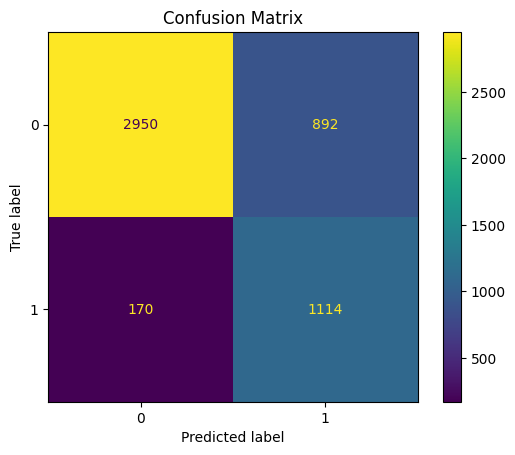

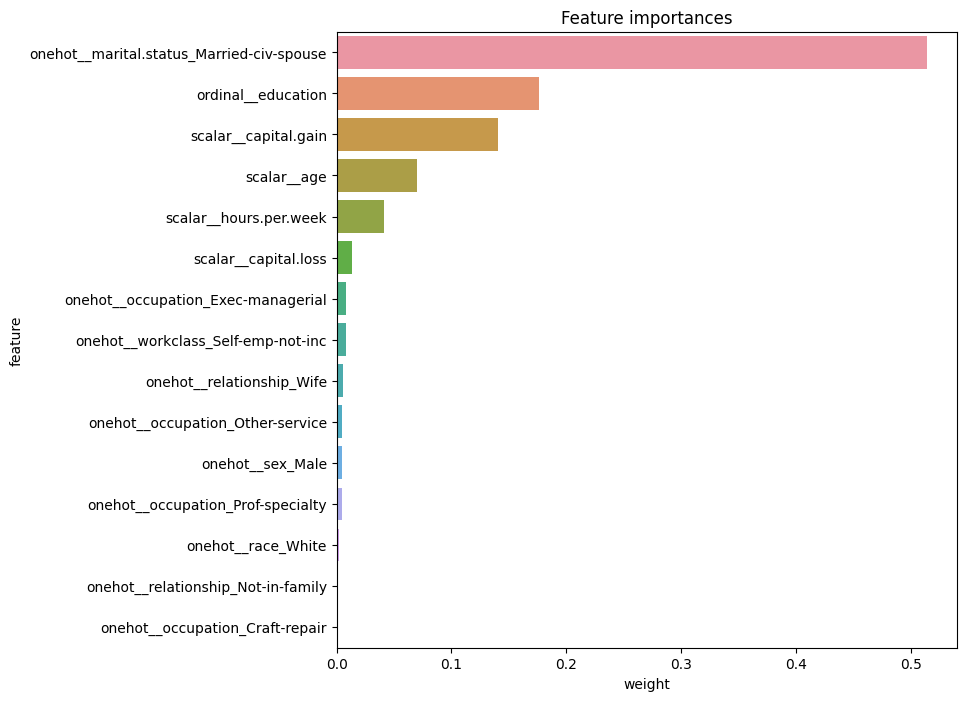

In [39]:
# GridSearchCV DTC imbpipeline
# pipe with preprocessor, RUS and model
pipe_dtc_rus = imbpipeline([('preprocessing', preprocessor),
                            ('rus', RandomUnderSampler(random_state=42)),
                            ('dtc', DecisionTreeClassifier(random_state=42))
                            ])

param_grid = {
            'dtc__criterion': ['gini', 'entropy'],
            'dtc__max_depth': [x for x in range(8, 12, 1)],
            'dtc__min_samples_leaf': [x for x in range(30, 34, 1)],
            'dtc__min_samples_split': [x for x in range(77, 81, 1)],
            'dtc__max_features': ['auto', None]
            }

grid_dtc_rus = GridSearchCV(estimator=pipe_dtc_rus,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    n_jobs=-1,
                    cv=skf,
                    return_train_score=True
                    )

grid_dtc_rus.fit(X_train, y_train)

df_dtc_rus = pd.DataFrame(grid_dtc_rus.cv_results_)

# report
report(X_test, y_test, grid_dtc_rus, df_dtc_rus)

# plot feature importances
plt.figure(figsize=(8, 8))
dtc_feature_importante = pd.DataFrame({'feature': grid_dtc_rus.best_estimator_[:-1].get_feature_names_out(),
                                       'weight': grid_dtc_rus.best_estimator_.named_steps['dtc'].feature_importances_}).sort_values('weight',ascending=False).head(15)
sns.barplot(data=dtc_feature_importante, x='weight', y='feature')
plt.title('Feature importances')
plt.show()

## LogisticRegression

### without RUS

best_params_: {'lr__C': 0.25, 'lr__class_weight': None, 'lr__penalty': 'l2'}
Train_score: 0.9070842956648055
Test_score_: 0.905101610932965
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3842
           1       0.74      0.61      0.67      1284

    accuracy                           0.85      5126
   macro avg       0.81      0.77      0.78      5126
weighted avg       0.84      0.85      0.84      5126



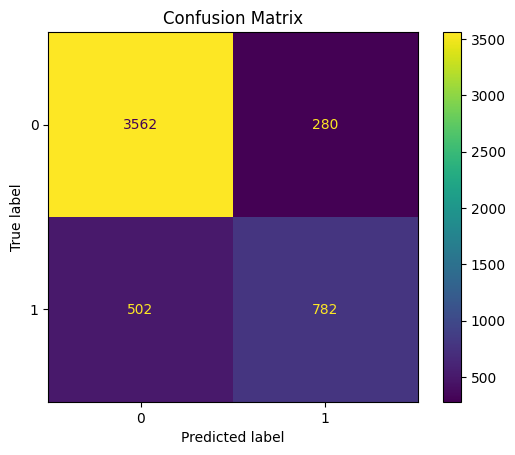

In [40]:
# GridSearchCV LR
# pipe with preprocessor and model
pipe_lr = Pipeline([('preprocessing', preprocessor),
                    ('lr', LogisticRegression(n_jobs=-1, random_state=42))
                    ])

param_grid = {
            'lr__C': [0.75, 0.5, 0.25, 0.1],
            'lr__penalty': ['l2', 'none'],
            'lr__class_weight': [None, 'balanced']
            }

grid_lr = GridSearchCV(estimator=pipe_lr,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_lr.fit(X_train, y_train)

df_lr = pd.DataFrame(grid_lr.cv_results_)

# report
report(X_test, y_test, grid_lr, df_lr)

### with RUS

best_params_: {'lr__C': 0.75, 'lr__class_weight': None, 'lr__penalty': 'l2'}
Train_score: 0.9067950391918334
Test_score_: 0.9046379812625268
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      3842
           1       0.58      0.85      0.69      1284

    accuracy                           0.81      5126
   macro avg       0.76      0.82      0.78      5126
weighted avg       0.85      0.81      0.82      5126



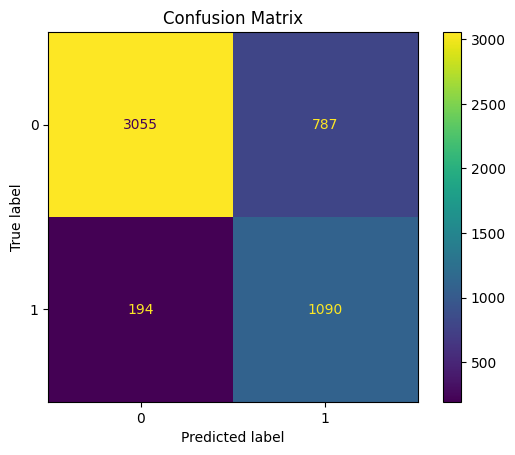

In [58]:
# GridSearchCV LR
# pipe with preprocessor and model
pipe_lr_rus = imbpipeline([('preprocessing', preprocessor),
                            ('rus', RandomUnderSampler(random_state=42)),
                            ('lr', LogisticRegression(n_jobs=-1, random_state=42))
                            ])

param_grid = {
            'lr__C': [1, 0.75, 0.5, 0.25, 0.1],
            'lr__penalty': ['l2', 'none'],
            'lr__class_weight': [None, 'balanced']
            }

grid_lr_rus = GridSearchCV(estimator=pipe_lr_rus,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_lr_rus.fit(X_train, y_train)

df_lr_rus = pd.DataFrame(grid_lr_rus.cv_results_)

# report
report(X_test, y_test, grid_lr_rus, df_lr_rus)

## SVM - SupportVectorClassifier balanced

best_params_: {'svc__C': 275, 'svc__gamma': 0.001}
Train_score: 0.9131399122068725
Test_score_: 0.9081278379910641
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      3842
           1       0.57      0.88      0.69      1284

    accuracy                           0.81      5126
   macro avg       0.76      0.83      0.78      5126
weighted avg       0.86      0.81      0.82      5126



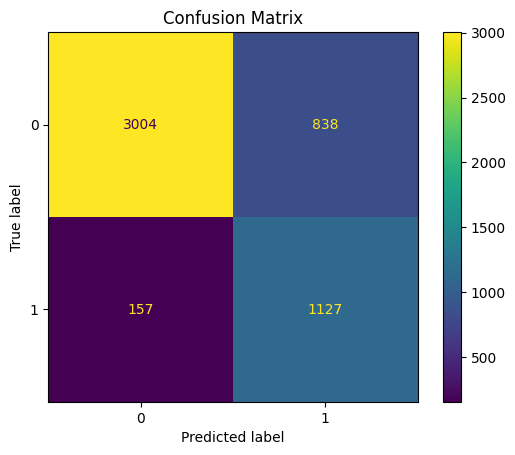

In [61]:
# GridSearchCV SVC
# pipe with preprocessor and model
pipe_svc = Pipeline([('preprocessing', preprocessor),
                    ('svc', SVC(class_weight='balanced', kernel='rbf', random_state=42))
                    ])

param_grid = {
              'svc__C': [270, 275, 280],
              'svc__gamma': [0.0025, 0.001, 0.0005]
            }

grid_svc = GridSearchCV(estimator=pipe_svc,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_svc.fit(X_train, y_train)

df_svc = pd.DataFrame(grid_svc.cv_results_)

# report
report(X_test, y_test, grid_svc, df_svc)

## RandomForestClassifier balanced

best_params_: {'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_depth': 23, 'rfc__min_samples_split': 83, 'rfc__n_estimators': 112}
Train_score: 0.9441797504533722
Test_score_: 0.9155124180613778
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3842
           1       0.60      0.86      0.71      1284

    accuracy                           0.82      5126
   macro avg       0.77      0.83      0.79      5126
weighted avg       0.86      0.82      0.83      5126



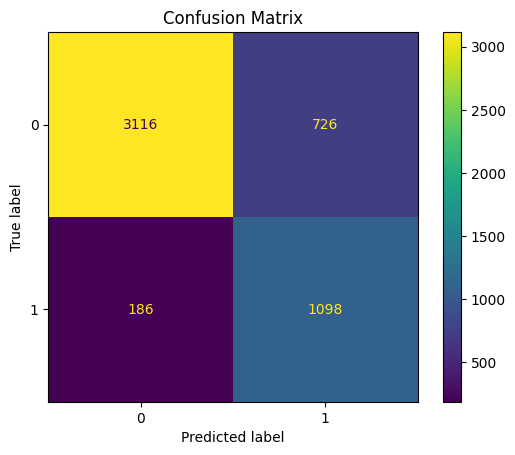

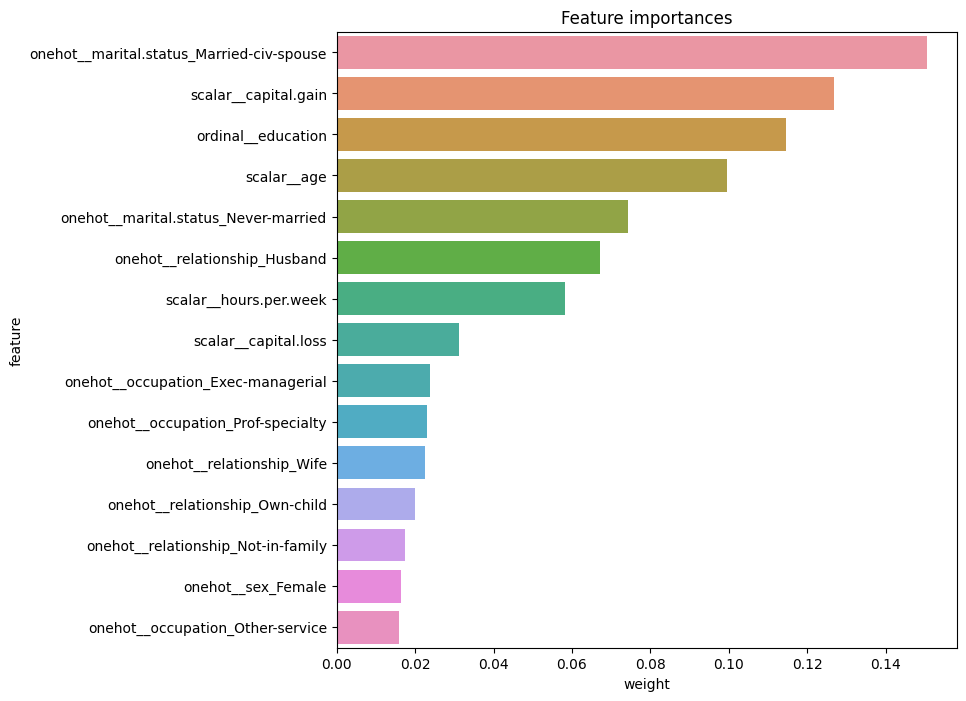

In [67]:
# GridSearchCV RFC
# pipe with preprocessor and model
pipe_rfc = Pipeline([('preprocessing', preprocessor),
                    ('rfc', RandomForestClassifier(n_jobs=-1, class_weight='balanced',  random_state=42))
                    ])

# param_grid
param_grid = {
            'rfc__n_estimators': [x for x in range(110, 114, 1)],
            'rfc__criterion': ['gini', 'entropy'],
            'rfc__max_depth': [x for x in range(22, 27, 1)],
            'rfc__min_samples_split': [x for x in range(81, 85, 1)],
            'rfc__bootstrap': [True, False]
            }

grid_rfc = GridSearchCV(estimator=pipe_rfc,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_rfc.fit(X_train, y_train)

df_rfc = pd.DataFrame(grid_rfc.cv_results_)

# report
report(X_test, y_test, grid_rfc, df_rfc)

# plot feature importances
plt.figure(figsize=(8, 8))
rfc_feature_importante = pd.DataFrame({'feature': grid_rfc.best_estimator_[:-1].get_feature_names_out(),
                                       'weight': grid_rfc.best_estimator_.named_steps['rfc'].feature_importances_}).sort_values('weight',ascending=False).head(15)
sns.barplot(data=rfc_feature_importante, x='weight', y='feature')
plt.title('Feature importances')
plt.show()

## RandomForestClassifier with SMOTETomek

best_params_: {'rfc_smt__bootstrap': True, 'rfc_smt__criterion': 'entropy', 'rfc_smt__max_depth': 24, 'rfc_smt__min_samples_split': 83, 'rfc_smt__n_estimators': 113}
Train_score: 0.9323002641869342
Test_score_: 0.9112444199138565
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3842
           1       0.63      0.83      0.71      1284

    accuracy                           0.83      5126
   macro avg       0.78      0.83      0.80      5126
weighted avg       0.86      0.83      0.84      5126



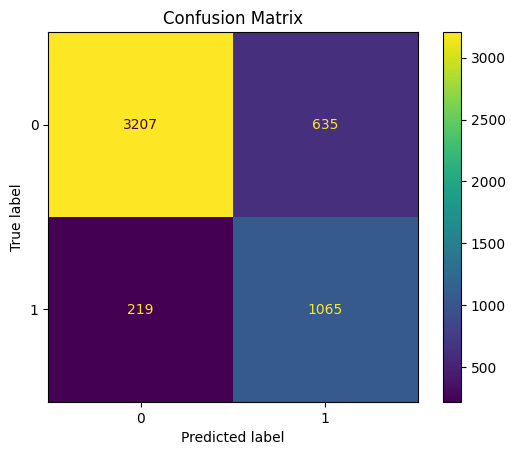

In [62]:
# GridSearchCV RFC with SMOTETomek
# pipe with preprocessor and model
tomeklinks = TomekLinks(sampling_strategy='all', n_jobs=-1)

pipe_rfc_smt = imbpipeline([('preprocessing', preprocessor),
                            ('smt', SMOTETomek(sampling_strategy='minority', tomek=tomeklinks, n_jobs=-1, random_state=42)),
                            ('rfc_smt', RandomForestClassifier(n_jobs=-1, class_weight=None,  random_state=42))
                            ])

# param_grid
param_grid = {
            'rfc_smt__n_estimators': [113],
            'rfc_smt__criterion': ['entropy'],
            'rfc_smt__max_depth': [24],
            'rfc_smt__min_samples_split': [83],
            'rfc_smt__bootstrap': [True]
            }

grid_rfc_smt = GridSearchCV(estimator=pipe_rfc_smt,
                            param_grid=param_grid,
                            scoring='roc_auc',
                            n_jobs=-1,
                            cv=skf,
                            return_train_score=True,
                            error_score='raise'
                            )

grid_rfc_smt.fit(X_train, y_train)

df_rfc_smt = pd.DataFrame(grid_rfc_smt.cv_results_)

# report
report(X_test, y_test, grid_rfc_smt, df_rfc_smt)

## AdaBoostClassifier with RUS

best_params_: {'abc__algorithm': 'SAMME.R', 'abc__learning_rate': 0.7, 'abc__n_estimators': 110}
Train_score: 0.919086291886982
Test_score_: 0.9151836492325586
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      3842
           1       0.60      0.86      0.70      1284

    accuracy                           0.82      5126
   macro avg       0.77      0.83      0.79      5126
weighted avg       0.86      0.82      0.83      5126



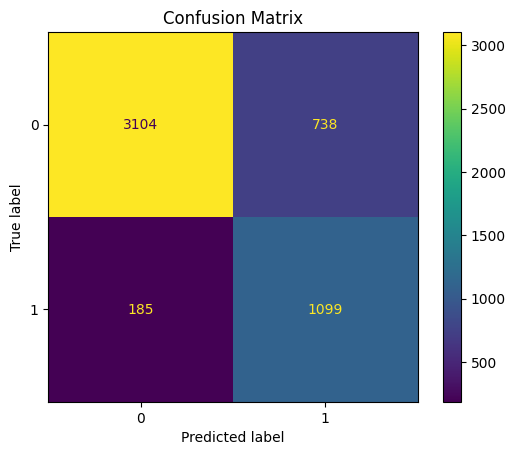

In [64]:
# GridSearchCV ABC
# pipe with preprocessor and model
pipe_abc_rus = imbpipeline([('preprocessing', preprocessor),
                        ('rus', RandomUnderSampler(random_state=42)),
                        ('abc', AdaBoostClassifier(random_state=42))
                        ])

# param_grid
param_grid = {
            'abc__n_estimators': [x for x in range(109, 114, 1)],
            'abc__learning_rate': [0.6, 0.65, 0.7],
            'abc__algorithm': ['SAMME', 'SAMME.R']
            }

grid_abc_rus = GridSearchCV(estimator=pipe_abc_rus,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_abc_rus.fit(X_train, y_train)

df_abc_rus = pd.DataFrame(grid_abc_rus.cv_results_)

# report
report(X_test, y_test, grid_abc_rus, df_abc_rus)

## XGBostClassifier

best_params_: {'xgb__gamma': 0.4, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 4, 'xgb__reg_alpha': 0.002}
Train_score: 0.939095785125134
Test_score_: 0.9242515010755786
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3842
           1       0.61      0.86      0.71      1284

    accuracy                           0.83      5126
   macro avg       0.78      0.84      0.80      5126
weighted avg       0.86      0.83      0.84      5126



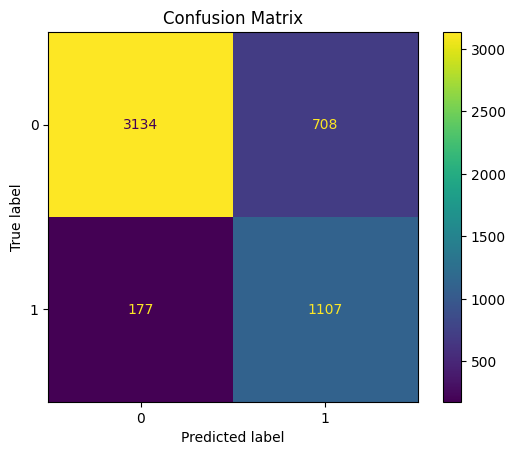

In [65]:
# GridSearchCV XGB
# pipe with preprocessor and model
pipe_xgb_rus = imbpipeline([('preprocessing', preprocessor),
                            ('rus', RandomUnderSampler(random_state=42)),
                            ('xgb', XGBClassifier(n_jobs=-1, random_state=42))
                            ])

param_grid = {
            'xgb__learning_rate': [0, 0.0001, 0.001, 0.01, 0.3],
            'xgb__gamma': [0, 0.001, 0.3, 0.4],
            'xgb__max_depth': [x for x in range(3, 6, 1)],
            #'xgb__subsample': [0.9, 1],
            'xgb__reg_alpha': [0, 0.0001, 0.001, 0.002, 0.004]
            }

grid_xgb_rus = GridSearchCV(estimator=pipe_xgb_rus,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True
                        )

grid_xgb_rus.fit(X_train, y_train)

df_xgb_rus = pd.DataFrame(grid_xgb_rus.cv_results_)

# report
report(X_test, y_test, grid_xgb_rus, df_xgb_rus)

## ploting models performance

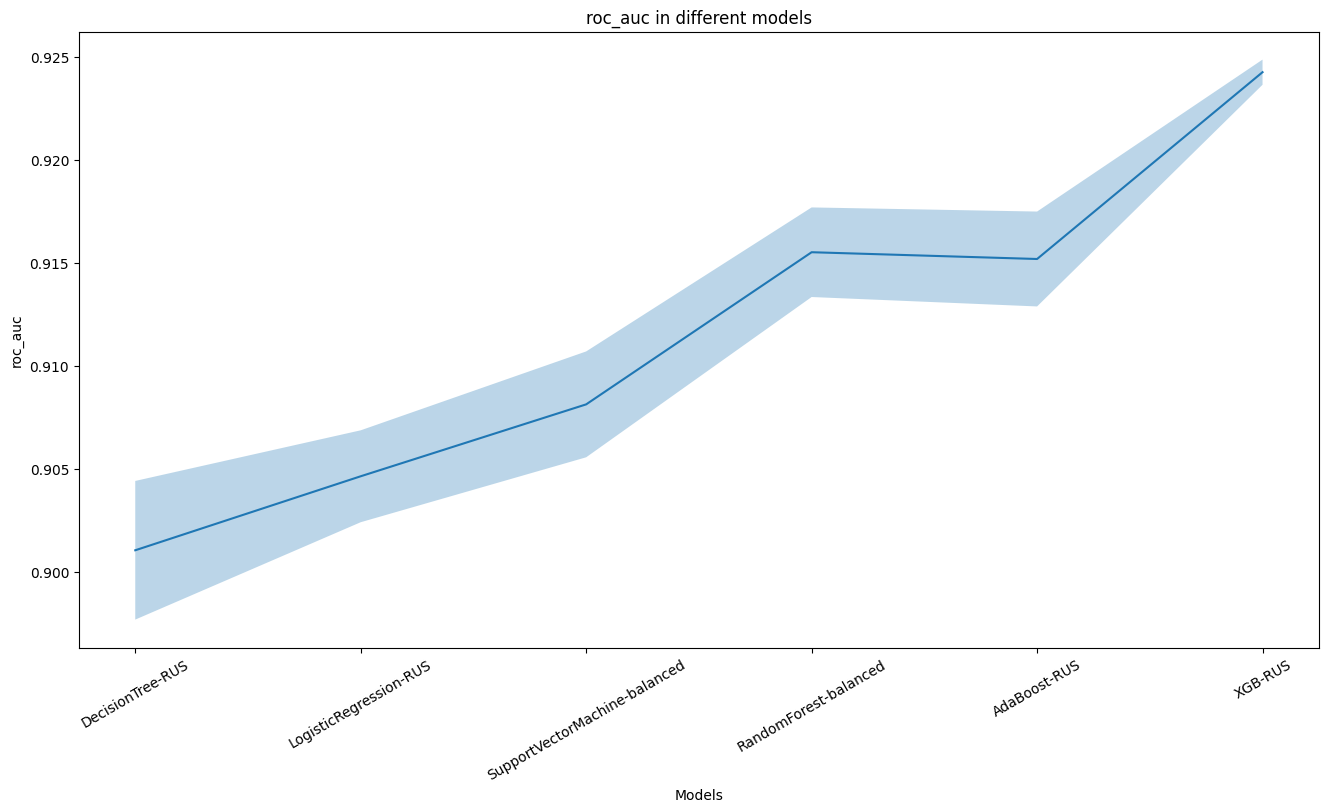

In [68]:
list_models = [df_dtc_rus, df_lr_rus, df_svc, df_rfc, df_abc_rus, df_xgb_rus]
list_models_names = ['DecisionTree-RUS', 'LogisticRegression-RUS', 'SupportVectorMachine-balanced', 'RandomForest-balanced', 'AdaBoost-RUS', 'XGB-RUS']
list_mean = []
list_3std = []

for model in list_models:
    list_mean.append(model.loc[model['rank_test_score'] == 1]['mean_test_score'].values[0])
    list_3std.append(model.loc[model['rank_test_score'] == 1]['std_test_score'].values[0])

models = pd.DataFrame({'model': list_models_names, 'mean_test_score': list_mean, 'std_test_score': list_3std})

# plot
plt.figure(figsize=(16, 8))

sns.lineplot(x=models['model'].values,
             y=models['mean_test_score'].values)

plt.fill_between(x=models['model'],
                 y1=models['mean_test_score'] + models['std_test_score'],
                 y2=models['mean_test_score'] - models['std_test_score'],
                 alpha=0.3)

plt.xticks(list(models['model'].values), rotation=30)
plt.title('roc_auc in different models')
plt.ylabel('roc_auc')
plt.xlabel('Models')
plt.show()

## LearningCurve to check de n entries with xgboost

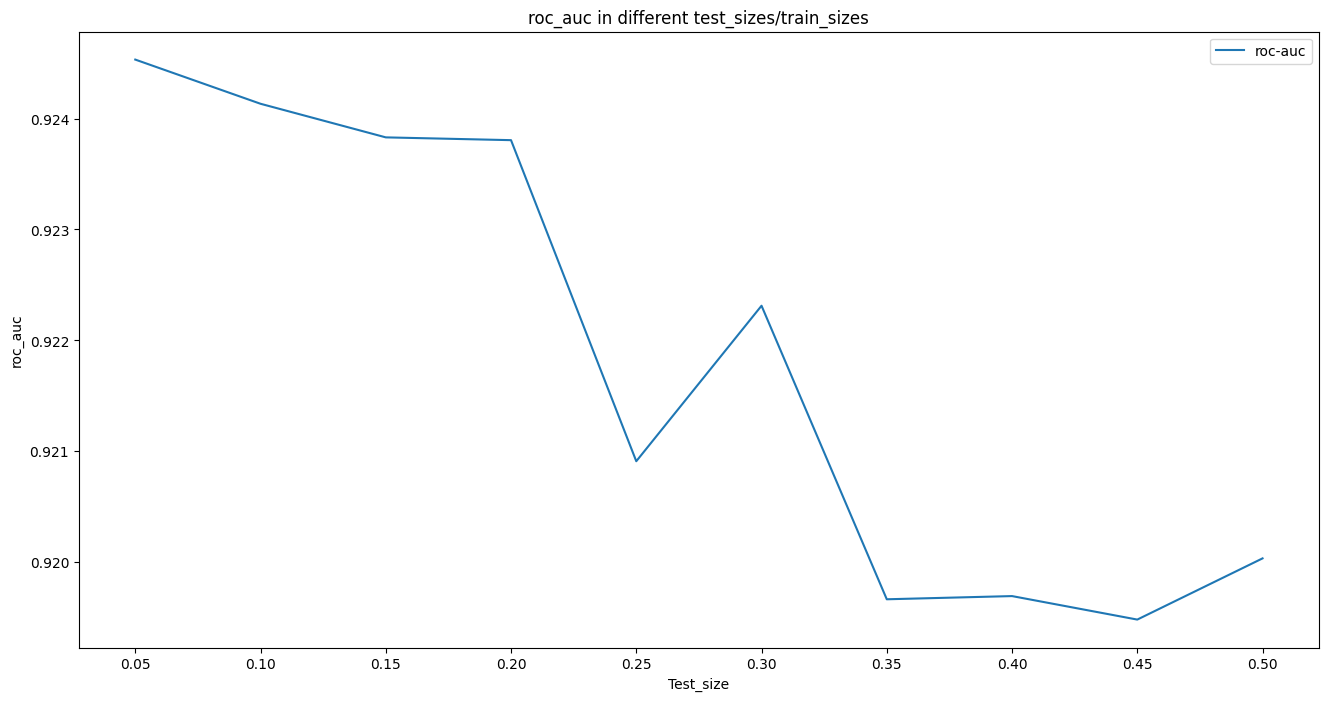

In [69]:
test_sizes = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
roc_auc = []

for test_size in test_sizes:
    # tts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    # Basis model GridSearchCV XGB
    # pipe with preprocessor and model
    pipe_xgb_rus_n = imbpipeline([('preprocessing', preprocessor),
                                ('rus', RandomUnderSampler(random_state=42)),
                                ('xgb', XGBClassifier(n_jobs=-1, random_state=42))
                                ])

    param_grid = {
                'xgb__learning_rate': [0.2],
                'xgb__gamma': [0.001],
                'xgb__max_depth': [4],
                'xgb__subsample': [1],
                'xgb__reg_alpha': [0.3]
                }

    grid_xgb_rus_n = GridSearchCV(estimator=pipe_xgb_rus_n,
                            param_grid=param_grid,
                            scoring='roc_auc',
                            n_jobs=-1,
                            cv=skf,
                            return_train_score=True
                            )

    grid_xgb_rus_n.fit(X_train, y_train)

    roc_auc.append(grid_xgb_rus_n.best_score_)

# plot
plt.figure(figsize=(16, 8))

sns.lineplot(x=test_sizes, y=roc_auc,
             label='roc-auc')

plt.xticks(test_sizes)
plt.title('roc_auc in different test_sizes/train_sizes')
plt.ylabel('roc_auc')
plt.xlabel('Test_size')
plt.show()

# summary

### XGB-RUS has the highest roc-auc and is followed by CBC and RFC balanced. RFC with SMOTTomek has the same recall value for 0 as for 1 (.83), so it can identify 83% of both categories 0 and 1.
### It is interesting to note that DTC performing without unbalance treatment has the hihgest overall accuracy and also the highest recall value of the majority category but the lowest recall value of the minority category. by othr side, the treatment of unbalanced data (RUS, SMOTETomek or class_weight='balanced') improve the recall value of minority class with a decrease in the racall of majority.
### The model to be chosen will depend on the importance of the categories to be identified. For this work, XGB balanced was chosen, with an overall accracy of 83% and 82% (recall=0.82) of 0 category identification and 87% (recall=0.87) for category 2.
I couldn't run a GridSearchCV in RFC with SMOTETomek because of the toaster (computer) lol :(. instead i used the best_parameters_ of RFC-balanced (better idea? i dont thin so, better than nothing? for sure)

In [ ]:
# load dataset
test = pd.read_csv('test.csv')
test.shape

(4881, 15)

In [ ]:
# check columns
tr = set(train.columns)
te = set(test.columns)
tr - te

{'income'}

### missing data

In [ ]:
test.loc[test['workclass'] == '?', 'workclass'].shape[0]

297

In [ ]:
test.loc[test['occupation'] == '?', 'occupation'].shape[0]

297

In [ ]:
test.loc[(test['workclass'] == '?') & (test['occupation'] == '?')].shape[0]

297

### 

In [ ]:
# id column
id_test = test['ID']
id_test[0:5]

0     3643
1    16036
2     9401
3    17903
4     5198
Name: ID, dtype: int64

In [ ]:
# xgbgrid_xgb_rus
y_test_pred = grid_xgb_rus.predict(test)
y_test_pred

# export df
newtest_pred = pd.DataFrame({'ID': id_test, 'PRED': y_test_pred}).set_index('ID')
newtest_pred.to_csv('Sprint1MAGLIA.csv')